# Homework 4

## Question 1

In [3]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

Relevant form of Antoine Equation:

$$ ln(P^{sat})= A - \frac{B}{T+C} $$

Pressure [=] kPa, Temp [=] degrees Celsius.

Raoult's Law combined with Antoine Equation for 1-propanol (P), 1-butanol (B):

$$ y_P * P = x_P * e^{ [A_P - \frac{B_P}{T+C_P}]} $$
$$ y_B * P = x_B * e^{ [A_B - \frac{B_B}{T+C_B}]} $$

Additional useful equations:

$$ x_P + x_B = 1 $$

Solved for zero:

$$ x_P * e^{ [A_P - \frac{B_P}{T+C_P}]} - y_P * P = 0 $$
$$ x_B * e^{ [A_B - \frac{B_B}{T+C_B}]} - y_B * P = 0 $$
$$ 1 - x_P - x_B = 0 $$

In [85]:
def antrat1(x,args):
    '''
    This function uses the left-hand side of the equations listed above and 
    given x and args values (defined below) to calculate the right-hand side 
    of the equation, which should be zero given the correct values. 

    Inputs:
    x - unknowns, will initially be given initial guesses, will be optimized later.
    args - parameters

    Output:
    f - calculated values of above equations
    '''
    
    #Unknowns:
    xp = x[0]
    xb = x[1]
    P = x[2]
    
    #Parameters:
    yp = args[0]
    yb = args[1]
    ap = args[2]
    bp = args[3]
    cp = args[4]
    ab = args[5]
    bb = args[6]
    cb = args[7]
    T = args[8]
    
    f = np.zeros([3])
    f[0] = xp*np.exp(ap-(bp/(T+cp))) - yp*P
    f[1] = xb*np.exp(ab-(bb/(T+cb))) - yb*P
    f[2] = 1 - xp - xb
    
    return f

In [5]:
#Here, I define initial guess values for x [xp,xb,P], and define the args [yp,yb,ap,bp,cp,ab,bb,cb,T] array.
xinit = np.array([0.5,0.5,100])
args = np.array([0.9,0.1,16.1154,3483.67,205.807,15.3144,3212.43,182.739,45])

In [6]:
#Function test using xinit, args
print(antrat1(xinit,args))

[-85.37068349  -8.32552417   0.        ]


Since the values in f when using xinit are so high, we have to use fsolve to find more accurate values. Shown below.

In [7]:
solvedx = opt.fsolve(antrat1,xinit,args)
print(np.round(solvedx,3))

[0.765 0.235 7.87 ]


In [8]:
#Checking work, if correct, should return zeros.
check = antrat1(solvedx,args)
print(check)

[ 8.88178420e-16  1.11022302e-16 -2.77555756e-17]


Although these numbers are not precisely zero, they are very close to zero. The level of precision we would need to have for these values to matter is much greater than 3 sig figs. Therefore, under the given conditions,

$$ x_P = 0.765 $$
$$ x_B = 0.235 $$
$$ P = 7.87 \space kPa $$

## Question 2

Additional equation solved for zero:

$$ 1 - y_1 - y_2 = 0 $$

Since there are only 2 unknowns in this problem, we can use this equation and the first Antoine-Raoult combined equation from problem 1. This will still give us 0 degrees of freedom.

Although the problem statement does not state it explicitly, I will choose the temperature to be 45 degrees Celsius. In the table of Parameters for Antoine Equation, this temperature is within the range for both 1-butanol and 2-butanol.

In [9]:
def antrat2(x,args):
    '''
    This function is very similar to antrat1, but has different unknowns and deals
    with 1-butanol (1), and 2-butanol (2).
    Pressure = 1atm = 101.325 kPa
    Temperature = 45 degrees Celsius
    '''
    
    #Unknowns:
    y1 = x[0]
    y2 = x[1]
    
    #Parameters:
    x1 = args[0]
    x2 = args[1]
    a1 = args[2]
    b1 = args[3]
    c1 = args[4]
    a2 = args[5]
    b2 = args[6]
    c2 = args[7]
    T = args[8]
    P = args[9]
    
    f = np.zeros([2])
    f[0] = x1*np.exp(a1-(b1/(T+c1))) - y1*P
    f[1] = 1 - y1 - y2
    
    return f

In [10]:
xinit2 = np.array([0.5,0.5])
args2 = np.array([0.5,0.5,15.3144,3212.43,182.739,15.1989,3026.03,186.5,45,101.325])

In [11]:
#Function test
print(antrat2(xinit2,args2))

[-48.98802417   0.        ]


In [12]:
solvedx2 = opt.fsolve(antrat2,xinit2,args2)
print(np.round(solvedx2,3))

[0.017 0.983]


In [13]:
check2 = antrat2(solvedx2,args2)
print(check2)

[2.22044605e-16 0.00000000e+00]


Again, these f values are very close to zero and are beyond our level of precision. 

$$ y_1 = 0.017 $$
$$ y_2 = 0.983 $$

Part B: The structure of 1- and 2-butanol are different. Since the alcohol functional group is on the end for 1-butanol, it is more likely to have strong hydrogen-bonding in the liquid phase and does not evaporate as easily as 2-butanol. Therefore, it makes sense that in this mixture there is a higher percentage of 2-butanol gas than 1-butanol gas.

## Question 3

Equations to use:

$$ x_o * e^{ [A_o - \frac{B_o}{T+C_o}]} - y_o * P = 0 $$
$$ x_m * e^{ [A_m - \frac{B_m}{T+C_m}]} - y_m * P = 0 $$
$$ x_p * e^{ [A_p - \frac{B_p}{T+C_p}]} - y_p * P = 0 $$
$$ 1 - y_o - y_m - y_p = 0 $$

In [14]:
def antrat3(x,args):
    '''
    This function again is similar to the previous two. This time,
    the unknowns are the molar composition of the gas phase, and we are 
    dealing with 3 substances: ortho (o), meta (m), and para (p) isomers of 
    xylene.

    Pressure [=] kPa in this function, but will be converted to atm later.
    Temp [=] degrees Celsius
    '''
    
    #Unknowns:
    yo = x[0]
    ym = x[1]
    yp = x[2]
    P = x[3]
    
    #Parameters:
    xo = args[0]
    xm = args[1]
    xp = args[2]
    ao = args[3]
    bo = args[4]
    co = args[5]
    am = args[6]
    bm = args[7]
    cm = args[8]
    ap = args[9]
    bp = args[10]
    cp = args[11]
    T = args[12]
    
    f = np.zeros([4])
    f[0] = xo*np.exp(ao-(bo/(T+co))) - yo*P
    f[1] = xm*np.exp(am-(bm/(T+cm))) - ym*P
    f[2] = xp*np.exp(ap-(bp/(T+cp))) - yp*P
    f[3] = 1 - yo - ym - yp
    
    return f

In [15]:
xinit3 = np.array([0.33,0.33,0.33,100])
args3 = np.array([0.33,0.33,0.33,14.0415,3358.79,212.041,14.1387,3381.81,216.120,14.0579,3331.45,214.627,135])

In [16]:
#Function test
print(antrat3(xinit3,args3))

[-7.0940974  -3.07949986 -2.41058431  0.01      ]


In [17]:
solvedx3 = opt.fsolve(antrat3,xinit3,args3)
print(np.round(solvedx3,3))

[ 0.3    0.346  0.354 86.416]


In [18]:
check = antrat3(solvedx3,args3)
print(check)

[ 3.55271368e-15 -7.10542736e-15 -3.55271368e-15 -5.55111512e-17]


In [19]:
#Converting pressure to atm
P_atm = solvedx3[3]*0.00986923
print(np.round(P_atm,3))

0.853


Again, the f values are very small, so this optimization was successful. Here are the found values for the gas phase composition and the pressure:

$$ y_o = 0.300 $$
$$ y_m = 0.346 $$
$$ y_p = 0.354 $$
$$ P = 0.853 \space atm $$

## Question 4

Necessary Equations:

$$ x_A * e^{(A_A-\frac{B_A}{T+C_A})}-y_A*P=0 $$ 
$$ x_B * e^{(A_B-\frac{B_B}{T+C_B})}-y_B*P=0 $$
$$ 1-y_A-y_B=0 $$
$$ 1-x_A-x_B=0 $$

For Acetone (A) and Acetonitrile (B)

Antoine Equation parameters:

$$ ln(P_{sat,\space A}) = 14.3145 - \frac{2756.22}{T+288.060} $$
$$ ln(P_{sat,\space 
B}) = 14.8950 - \frac{3413.10}{T+250.523} $$

Pressure [=] kPa

In [86]:
def antrat4(x,args):
    '''
    This function is again very similar to the others. The difference here is that the xa variable will later be defined as 
    a list of values at regular intervals from 0 to 1. The function will then take a value in that list as an xa value, and 
    the the other values in the x array, and calculate the values of the equations defined above.

    Input:
    x - unknown values, will optimize function to find actual values later.
    args - parameters and list of possible xa values

    Output:
    f - array of values of equations above.
    '''
    
    #Unknowns:
    xb = x[0]
    ya = x[1]
    yb = x[2]
    T = x[3]
    
    #Parameters:
    xa = args[0]
    aa = args[1]
    ba = args[2]
    ca = args[3]
    ab = args[4]
    bb = args[5]
    cb = args[6]
    P = args[7]
    
    f = np.zeros([4])
    f[0] = xa*np.exp(aa-(ba/(T+ca))) - ya*P
    f[1] = xb*np.exp(ab-(bb/(T+cb))) - yb*P
    f[2] = 1-ya-yb
    f[3] = 1-xa-xb
    
    return f

In [87]:
#Here, I define a list of xa values from 0 to 1 at intervals of 0.01.
xlist = np.arange(0.0,1.01,0.01)
print(xlist)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]


In [88]:
#This will determine how long the placeholder arrays should be.
length = np.shape(xlist)
print(length[0])

101


In [89]:
#Creating placeholder arrays
xb = np.zeros(length[0])
ya = np.zeros(length[0])
yb = np.zeros(length[0])
T = np.zeros(length[0])
print(xb)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


In [90]:
#Defining initial guesses, to be optimized.
xinit4 = [0.5,0.5,0.5,300]

#Looping over each value in xlist, and optimizing the initial guess values at that xa concentration.
for i in range(0,length[0]):
    args4 = [xlist[i],14.3145,2756.22,228.060,14.8950,3413.10,250.523,75.99375]
    [xb[i],ya[i],yb[i],T[i]] = opt.fsolve(antrat4,xinit4,args4)


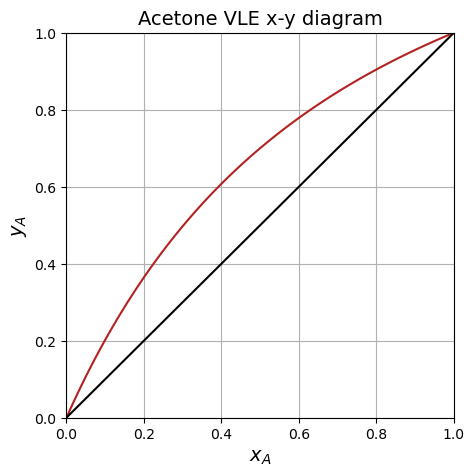

In [93]:
#x-y diagram overlayed w/y=x line. Acetone is more volatile, so I will graph in terms of xa and ya.
plt.figure(figsize=(5,5))
plt.plot(xlist, ya, color = 'firebrick')
plt.plot([0,1],[0,1],color = 'black')
plt.title('Acetone VLE x-y diagram',fontsize=14)
plt.xlabel('$x_A$',fontsize = 14)
plt.ylabel('$y_A$',fontsize = 14)
plt.xlim([0,1])
plt.ylim([0,1])
plt.grid(True)

Text(0.35, 57, 'Two-phase')

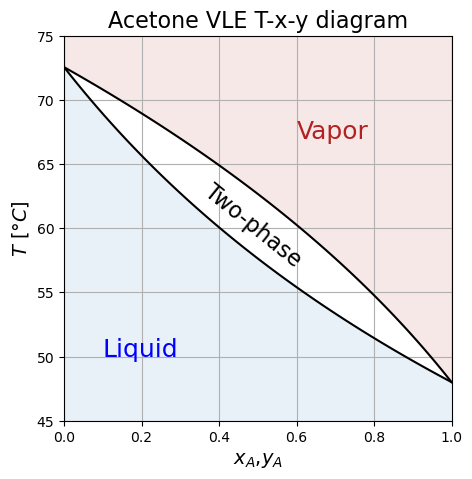

In [92]:
#VLE T-x-y diagram. Again, Acetone is more volatile, so the x and y values will be xa and ya.
plt.figure(figsize=(5,5))
plt.plot(xlist,T,color='black')
plt.plot(ya,T,color='black')
plt.title('Acetone VLE T-x-y diagram',fontsize=16)
plt.xlabel('$x_A$,$y_A$',fontsize = 14)
plt.ylabel('$T$ $[\degree C]$',fontsize=14)
plt.xlim([0,1])
plt.ylim([45,75])
plt.grid(True)

plt.fill_between(xlist,10,T,alpha=0.1)
plt.fill_between(ya,T,80,alpha=0.1,color='firebrick')
plt.text(0.1,50,'Liquid',dict(size=18),color='blue')
plt.text(0.6,67,'Vapor',dict(size=18),color='firebrick')
plt.text(0.35,57,'Two-phase',dict(size=16),color='black',rotation=-39)

